In [176]:
import requests
import bs4
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scrapping of Single Page

In [294]:
Brand=[]
Capacity=[]
Doors=[]
Stars=[]
Ratings=[]
Compressor=[]
price=[]
Compressor=[]
url="https://www.flipkart.com/search?q=refrigerator&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9"
}
response=requests.get(url,headers=headers)
if response.status_code==200:
    soup=BeautifulSoup(response.text)
    for ele in soup.find_all('div',class_='jIjQ8S'):
        t= ele.find('div',class_='RG5Slk').text
        b=re.findall('^\w+',t)[0]
        Brand.append(b)
        #capacity
        c=re.findall('\w+(\s\d+)\sL',t)
        Capacity.append(c[0])
        #doors
        d=re.findall('\w+\sDoor',t)
        if d:
            Doors.append(d[0])
        else:
            Doors.append(np.nan)
        #stars
        s=re.findall('\d+\sStar',t)
        if s:
            Stars.append(s[0])
        else:
            Stars.append(np.nan)
        #ratings
        r=ele.find('div',class_='MKiFS6')
        Ratings.append(r)
        Compressor.append(c[0])
        #Price
        P=ele.find('div',class_='hZ3P6w DeU9vF').text
        price.append(P)


In [295]:
price

['₹25,490',
 '₹11,990',
 '₹13,990',
 '₹16,190',
 '₹17,290',
 '₹11,990',
 '₹16,490',
 '₹13,990',
 '₹8,490',
 '₹17,290',
 '₹35,490',
 '₹11,990',
 '₹14,490',
 '₹17,990',
 '₹25,490',
 '₹19,990',
 '₹13,490',
 '₹15,990',
 '₹12,390',
 '₹16,990',
 '₹16,240',
 '₹46,990',
 '₹19,290',
 '₹21,299']

In [298]:
Capacity

[' 244',
 ' 183',
 ' 185',
 ' 183',
 ' 183',
 ' 185',
 ' 184',
 ' 183',
 ' 90',
 ' 183',
 ' 325',
 ' 180',
 ' 190',
 ' 189',
 ' 236',
 ' 215',
 ' 183',
 ' 183',
 ' 183',
 ' 185',
 ' 192',
 ' 396',
 ' 234',
 ' 240']

In [299]:
Stars

['4 Star',
 '2 Star',
 '2 Star',
 '4 Star',
 '5 Star',
 '2 Star',
 '5 Star',
 '2 Star',
 '1 Star',
 '5 Star',
 '3 Star',
 '2 Star',
 '4 Star',
 '5 Star',
 '3 Star',
 '5 Star',
 '2 Star',
 '5 Star',
 '2 Star',
 '5 Star',
 '4 Star',
 '3 Star',
 '5 Star',
 '2 Star']

In [300]:
print(len(Brand))
print(len(Capacity))
print(len(Ratings))
print(len(price))
print(len(Stars))
print(len(Compressor))
print(len(Doors))

24
24
24
24
24
24
24


# Scrapping Data From Multiple Pages

In [322]:
brand=[]
capacity=[]
doors=[]
stars=[]
ratings=[]
compressor=[]
Price=[]
for i in range(1,51):
    url = f"https://www.flipkart.com/search?q=refrigerator&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}"
    headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9"
}
    response = requests.get(url,headers=headers)
    if response.status_code==200:
        soup = BeautifulSoup(response.text)
        for ele in soup.find_all('div',class_='jIjQ8S'):
        #Brand
            t= ele.find('div',class_='RG5Slk').text
            b=re.findall('^\w+',t)[0]
            brand.append(b)
        #capacity
            c=re.findall('\w+(\s\d+)\sL',t)
            if c:
                capacity.append(c[0])
            else:
                capacity.append(np.nan)
        #doors
            d=re.findall('\w+\sDoor',t)
            if d:
                doors.append(d[0])
            else:
                doors.append(np.nan)
        #stars
            s=re.findall('(\d+)\sStar',t)
            if s:
                stars.append(s[0])
            else:
                stars.append(np.nan)
        #ratings
            r=ele.find('div',class_='MKiFS6')
            if r:
                ratings.append(r.text)
            else:
                ratings.append(np.nan)
        #Price
            p=ele.find('div',class_='hZ3P6w DeU9vF').text
            Price.append(p)


        else:
            print('something went wrong')

something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something went wrong
something wen

In [323]:
len(brand)

984

In [324]:
len(ratings)

984

In [325]:
len(Price)

984

In [326]:
len(capacity)

984

In [327]:
len(stars)

984

In [328]:
len(doors)

984

In [309]:
capacity

[' 185',
 ' 223',
 ' 185',
 ' 183',
 ' 183',
 ' 183',
 ' 185',
 ' 244',
 ' 184',
 ' 183',
 ' 223',
 ' 236',
 ' 183',
 ' 244',
 ' 90',
 ' 325',
 ' 396',
 ' 236',
 ' 180',
 ' 236',
 ' 330',
 ' 236',
 ' 189',
 ' 190',
 ' 184',
 ' 183',
 ' 185',
 ' 244',
 ' 256',
 ' 183',
 ' 223',
 ' 236',
 ' 233',
 ' 183',
 ' 183',
 ' 180',
 ' 244',
 ' 396',
 ' 180',
 ' 189',
 ' 236',
 ' 330',
 ' 190',
 ' 197',
 ' 243',
 ' 190',
 ' 236',
 ' 236',
 ' 185',
 ' 244',
 ' 185',
 ' 223',
 ' 183',
 ' 183',
 ' 236',
 ' 183',
 ' 223',
 ' 396',
 ' 350',
 ' 180',
 ' 350',
 ' 419',
 ' 201',
 ' 183',
 ' 187',
 ' 472',
 ' 244',
 ' 330',
 ' 183',
 ' 190',
 ' 330',
 ' 467',
 ' 183',
 ' 194',
 ' 183',
 ' 236',
 ' 244',
 ' 183',
 ' 183',
 ' 350',
 ' 180',
 ' 201',
 ' 183',
 ' 187',
 ' 472',
 ' 183',
 ' 190',
 ' 602',
 ' 233',
 ' 223',
 ' 236',
 ' 385',
 ' 228',
 ' 322',
 ' 183',
 ' 228',
 ' 185',
 ' 223',
 ' 190',
 ' 330',
 ' 183',
 ' 184',
 ' 244',
 ' 223',
 ' 228',
 ' 243',
 ' 236',
 ' 244',
 ' 190',
 ' 419',
 ' 303',
 '

In [310]:
ratings

['4.3',
 '4.2',
 '4.3',
 '4.3',
 '4.5',
 '4.5',
 '4.3',
 '4.2',
 '4.4',
 '4.5',
 '4.2',
 '4.4',
 '4.5',
 '4.2',
 '4.2',
 '4.4',
 '4.2',
 '4.4',
 '4.3',
 '4.4',
 '4.2',
 '4.3',
 '4.5',
 '4.4',
 '4.3',
 '4.4',
 '4.3',
 '4.2',
 '4.3',
 '4.5',
 '4.2',
 '4.4',
 '4.3',
 '4.3',
 '4.5',
 '4.3',
 '4.2',
 '4.2',
 '4.4',
 '4.5',
 '4.4',
 '4.2',
 '4.4',
 '4.4',
 '4.2',
 '4.4',
 '4.3',
 '4.4',
 '4.4',
 '4.2',
 '4.3',
 '4.2',
 '4.3',
 '4.5',
 '4.3',
 '4.4',
 '4.2',
 '4.2',
 '4.2',
 '4.4',
 '4.2',
 '4.2',
 '4.4',
 '4.5',
 '4.4',
 '4.3',
 '4.2',
 '4.2',
 '4.2',
 '4.3',
 '4.2',
 '4.1',
 '4.3',
 '4.3',
 '4.5',
 '4.3',
 '4.2',
 '4.4',
 '4.4',
 '4.2',
 '4.4',
 '4.4',
 '4.5',
 '4.4',
 '4.3',
 '4.2',
 '4.3',
 '4.5',
 '4.3',
 '4.2',
 '4.4',
 '4.2',
 '4.2',
 '4.2',
 '4.1',
 '4.4',
 '4.3',
 '4.2',
 '4.4',
 '4.2',
 '4.5',
 '4.4',
 '4.2',
 '4.2',
 '4.2',
 '4.3',
 '4.4',
 '4.2',
 '4.3',
 '4.2',
 '4.4',
 '4.5',
 '4.2',
 '4.4',
 '4.4',
 '4.3',
 '4.3',
 '4.4',
 '4.3',
 '4.2',
 '4.4',
 '4.3',
 '4.3',
 '4.2',
 '4.1',


In [311]:
doors

['Single Door',
 'Double Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Double Door',
 'Single Door',
 'Single Door',
 'Double Door',
 'Double Door',
 'Single Door',
 'Double Door',
 'Single Door',
 'Double Door',
 'Double Door',
 'Double Door',
 'Single Door',
 'Double Door',
 'Double Door',
 'Double Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Double Door',
 'Double Door',
 'Single Door',
 'Double Door',
 'Double Door',
 'Double Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Double Door',
 'Double Door',
 'Single Door',
 'Single Door',
 'Double Door',
 'Double Door',
 'Single Door',
 'Single Door',
 'Double Door',
 'Single Door',
 'Double Door',
 'Double Door',
 'Single Door',
 'Double Door',
 'Single Door',
 'Double Door',
 'Single Door',
 'Single Door',
 'Double Door',
 'Single Door',
 'Double Door',
 'Double Door',
 'Double Door',
 'Single Door',
 'Double Door',
 'Double Door',
 'Single

In [312]:
stars

['5',
 '3',
 '2',
 '2',
 '4',
 '5',
 '2',
 '4',
 '5',
 '2',
 '2',
 '3',
 '5',
 '4',
 '1',
 '3',
 '3',
 '2',
 '2',
 '3',
 '2',
 '2',
 '5',
 '4',
 '2',
 '4',
 '5',
 '4',
 '3',
 '5',
 '2',
 '3',
 '2',
 '2',
 '4',
 '2',
 '4',
 '3',
 '4',
 '5',
 '2',
 '2',
 '5',
 '5',
 '2',
 '4',
 '2',
 '3',
 '4',
 '4',
 '5',
 '2',
 '3',
 '4',
 '3',
 '3',
 '3',
 '3',
 '3',
 '4',
 '2',
 '3',
 '5',
 '4',
 '5',
 nan,
 '4',
 '3',
 '3',
 '2',
 '3',
 '3',
 '3',
 '5',
 '4',
 '3',
 '4',
 '4',
 '3',
 '3',
 '4',
 '5',
 '4',
 '5',
 nan,
 '3',
 '2',
 nan,
 '3',
 '3',
 '5',
 '2',
 '3',
 '3',
 '4',
 '5',
 '5',
 '3',
 '5',
 '2',
 '5',
 '5',
 '4',
 '2',
 '3',
 '3',
 '3',
 '4',
 '3',
 '3',
 '3',
 nan,
 '3',
 '2',
 '5',
 '3',
 '2',
 '3',
 '4',
 '2',
 '5',
 '2',
 '5',
 '3',
 '2',
 '3',
 '4',
 '2',
 '3',
 nan,
 '3',
 '5',
 '3',
 '4',
 '4',
 '3',
 '2',
 '2',
 '5',
 '5',
 '4',
 '4',
 '2',
 '3',
 '5',
 '3',
 '5',
 '3',
 '2',
 nan,
 '5',
 '3',
 '4',
 '3',
 '3',
 nan,
 '4',
 '3',
 '5',
 '3',
 '5',
 '4',
 '2',
 '2',
 nan,
 '5',
 '2'

In [489]:
data={'Brand':brand,'Capacity(in L)':capacity,'Rating':ratings,'Doors':doors,'Stars':stars,'Price':Price}

In [490]:
df=pd.DataFrame(data)

In [491]:
df

,Brand,Capacity(in L),Rating,Doors,Stars,Price
0,Godrej,185,4.3,Single Door,5,"₹15,790"
1,Godrej,223,4.2,Double Door,3,"₹21,690"
2,Voltas,183,4.3,Single Door,2,"₹11,990"
3,Haier,185,4.3,Single Door,2,"₹11,990"
4,Samsung,183,4.5,Single Door,2,"₹13,990"
...,...,...,...,...,...,...
979,Haier,190,4.2,Single Door,5,"₹18,699"
980,Samsung,330,4.2,Double Door,2,"₹36,990"
981,Samsung,236,4.3,Double Door,2,"₹23,190"
982,Electrolux,503,4.2,Double Door,1,"₹61,490"


In [492]:
df['Price']=df['Price'].apply(lambda x:re.sub('[^\d+]','',x))

In [493]:
df

,Brand,Capacity(in L),Rating,Doors,Stars,Price
0,Godrej,185,4.3,Single Door,5,15790
1,Godrej,223,4.2,Double Door,3,21690
2,Voltas,183,4.3,Single Door,2,11990
3,Haier,185,4.3,Single Door,2,11990
4,Samsung,183,4.5,Single Door,2,13990
...,...,...,...,...,...,...
979,Haier,190,4.2,Single Door,5,18699
980,Samsung,330,4.2,Double Door,2,36990
981,Samsung,236,4.3,Double Door,2,23190
982,Electrolux,503,4.2,Double Door,1,61490


In [494]:
df.isnull().sum()

Brand               0
Capacity(in L)      0
Rating            128
Doors              51
Stars              57
Price               0
dtype: int64

In [495]:
numeric_cols=['Capacity(in L)','Stars','Price','Rating']
for col in numeric_cols:
    df[col]=pd.to_numeric(df[col],errors='coerce')

## Removing Null values

In [496]:
df['Capacity(in L)'].mean()

np.float64(259.9857723577236)

In [497]:
## removing null values in capacity column:
df['Capacity(in L)']=df['Capacity(in L)'].fillna(df['Capacity(in L)'].mean())

In [498]:
df['Capacity(in L)'].isnull().sum()

np.int64(0)

In [499]:
df['Rating'].mean()

np.float64(4.273831775700935)

In [500]:
## removing null values in capacity column:
df['Rating']=df['Rating'].fillna(df['Rating'].mean())

In [501]:
df['Rating'].isnull().sum()

np.int64(0)

In [502]:
##  removing null values in Doors column:
df['Doors']=df['Doors'].fillna('Single Door')

In [503]:
refridgerator['Doors'].mode()

0    Single Door
Name: Doors, dtype: object

In [504]:
df['Doors'].isnull().sum()

np.int64(0)

In [509]:
## removing null values in Stars:
df['Stars']=df['Stars'].fillna(df['Stars'].mode().values[0])

In [510]:
df['Stars'].isnull().sum()

np.int64(0)

In [511]:
df['Price'].isnull().sum()

np.int64(0)

### checking the null vallues

In [512]:
df.isnull().sum()

Brand             0
Capacity(in L)    0
Rating            0
Doors             0
Stars             0
Price             0
dtype: int64

# Basic Checks

In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           984 non-null    object 
 1   Capacity(in L)  984 non-null    int64  
 2   Rating          984 non-null    float64
 3   Doors           984 non-null    object 
 4   Stars           984 non-null    float64
 5   Price           984 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 46.3+ KB


In [514]:
df.dtypes

Brand              object
Capacity(in L)      int64
Rating            float64
Doors              object
Stars             float64
Price               int64
dtype: object

In [515]:
df.head()

,Brand,Capacity(in L),Rating,Doors,Stars,Price
0,Godrej,185,4.3,Single Door,5.0,15790
1,Godrej,223,4.2,Double Door,3.0,21690
2,Voltas,183,4.3,Single Door,2.0,11990
3,Haier,185,4.3,Single Door,2.0,11990
4,Samsung,183,4.5,Single Door,2.0,13990


In [487]:
df.sample(5)

,Brand,Capacity(in L),Rating,Doors,Stars,Price
956,Samsung,330,4.2,Double Door,2.0,36990
911,Samsung,236,4.3,Double Door,2.0,23190
194,Whirlpool,184,4.4,Single Door,5.0,16390
225,BOSCH,207,4.6,Single Door,4.0,18990
334,Haier,175,4.3,Single Door,2.0,11790


In [488]:
df.describe()

,Capacity(in L),Rating,Stars,Price
count,984.000000,984.000000,984.000000,984.000000
mean,259.985772,4.273832,3.038835,27806.744919
std,111.246968,0.200086,1.064837,18315.683638
min,4.000000,2.700000,1.000000,4490.000000
25%,190.000000,4.200000,2.000000,17141.750000
50%,235.000000,4.273832,3.000000,23190.000000
75%,265.000000,4.400000,4.000000,29991.000000
max,695.000000,5.000000,5.000000,239986.000000


In [370]:
df.describe(include='O')

,Brand,Doors
count,984,984
unique,30,4
top,Samsung,Double Door
freq,254,482


## Data Manipulations

### Univariate Analysis

In [516]:
df['Brand'].value_counts()

Brand
Samsung       254
Godrej        191
Whirlpool     178
Haier         113
LG             55
Voltas         35
BOSCH          28
Lloyd          26
IFB            20
CANDY          12
Panasonic      10
realme          9
MarQ            8
Electrolux      7
Midea           5
MOTOROLA        5
Kelvinator      5
BPL             4
Kenstar         3
Walton          3
Sharp           3
Acer            2
Liebherr        1
Lifelong        1
Llyod           1
TOSHIBA         1
Rockwell        1
Power           1
CRUISE          1
BLACK           1
Name: count, dtype: int64

In [517]:
df['Capacity(in L)'].value_counts()

Capacity(in L)
236    95
244    68
183    58
185    56
223    52
       ..
224     1
470     1
478     1
345     1
252     1
Name: count, Length: 131, dtype: int64

In [518]:
df['Doors'].value_counts()

Doors
Double Door    482
Single Door    478
Triple Door     23
French Door      1
Name: count, dtype: int64

## Bivariate Analysis

In [520]:
df.groupby('Brand')['Rating'].agg(['mean','max','min','median'])

,mean,max,min,median
Brand,,,,
Acer,4.500000,4.500000,4.500000,4.500000
BLACK,4.900000,4.900000,4.900000,4.900000
BOSCH,4.326368,4.600000,3.500000,4.300000
BPL,3.925000,4.100000,3.700000,3.950000
CANDY,4.333333,4.600000,4.100000,4.300000
CRUISE,4.273832,4.273832,4.273832,4.273832
Electrolux,4.471429,4.700000,4.200000,4.600000
Godrej,4.209488,4.600000,3.000000,4.200000
Haier,4.338731,5.000000,3.300000,4.300000


In [374]:
df.groupby('Doors')['Rating'].agg(['mean','max','min'])

,mean,max,min
Doors,,,
Double Door,4.240745,5.0,2.9
French Door,4.700000,4.7,4.7
Single Door,4.307346,5.0,2.7
Triple Door,4.252174,4.5,3.6


In [521]:
df.groupby('Brand')['Stars'].agg(['max','min'])

,max,min
Brand,,
Acer,3.0,2.0
BLACK,3.0,3.0
BOSCH,5.0,2.0
BPL,2.0,2.0
CANDY,5.0,1.0
CRUISE,2.0,2.0
Electrolux,2.0,1.0
Godrej,5.0,1.0
Haier,5.0,2.0


## Multivariate Analysis

In [522]:
df.groupby(['Stars','Rating','Price']).max()

Brand  Capacity(in L)        Doors
Stars Rating Price                                         
1.0   3.6    10190  Kelvinator              93  Single Door
      3.8    51990          LG             446  Double Door
      3.9    10190       Lloyd              92  Single Door
             10290          LG              43  Single Door
      4.1    9990        CANDY             165  Single Door
...                        ...             ...          ...
5.0   4.6    19767       BOSCH             187  Single Door
             19990       BOSCH             207  Single Door
             21490       BOSCH             207  Single Door
      4.8    20790       Haier             185  Single Door
      5.0    21350   Whirlpool             207  Single Door

[564 rows x 3 columns]

## VisualiZations Using Matplotlib and Seaborn

In [523]:
df

,Brand,Capacity(in L),Rating,Doors,Stars,Price
0,Godrej,185,4.3,Single Door,5.0,15790
1,Godrej,223,4.2,Double Door,3.0,21690
2,Voltas,183,4.3,Single Door,2.0,11990
3,Haier,185,4.3,Single Door,2.0,11990
4,Samsung,183,4.5,Single Door,2.0,13990
...,...,...,...,...,...,...
979,Haier,190,4.2,Single Door,5.0,18699
980,Samsung,330,4.2,Double Door,2.0,36990
981,Samsung,236,4.3,Double Door,2.0,23190
982,Electrolux,503,4.2,Double Door,1.0,61490


### Univariate Analysis

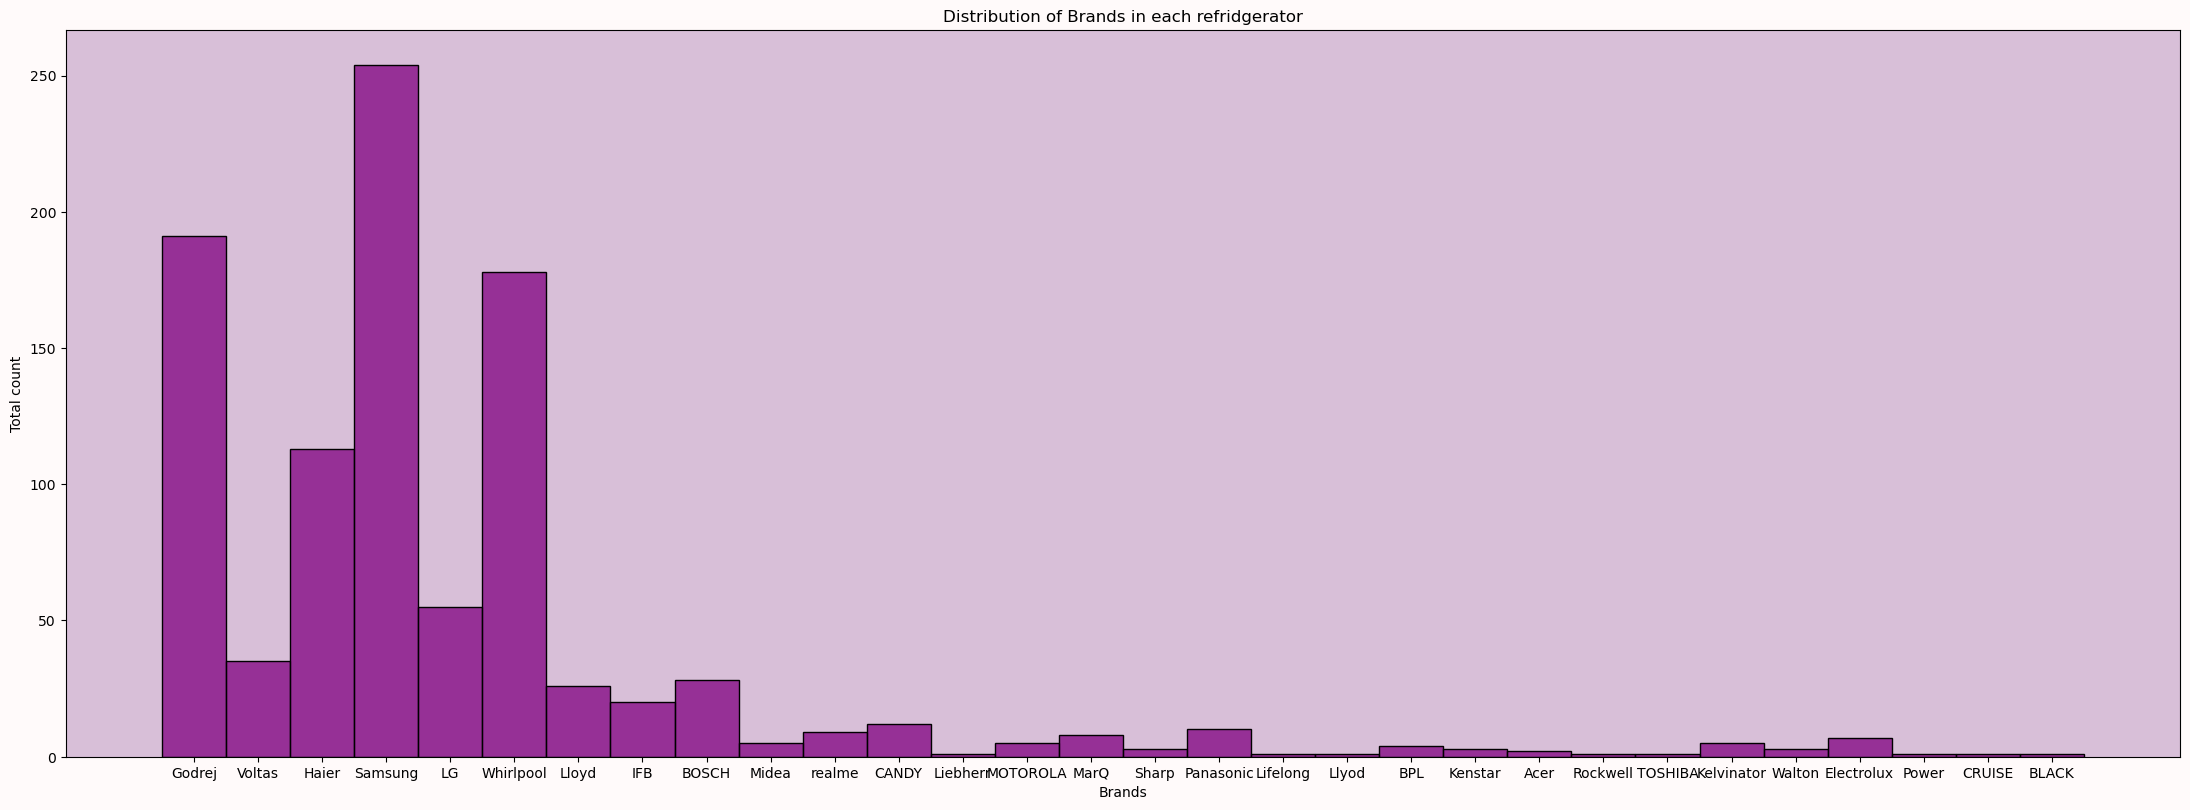

In [546]:
plt.figure(figsize=(22,8),facecolor='snow')
plt.axes(facecolor='thistle')
sns.histplot(df,x='Brand',color='purple')
plt.xlabel('Brands')
plt.ylabel('Total count')
plt.tight_layout()
plt.title('Distribution of Brands in each refridgerator')
plt.show()

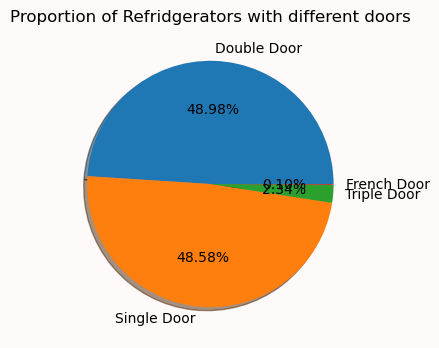

In [540]:
plt.figure(figsize=(4,4),facecolor='snow')
plt.axes(facecolor='thistle')
plt.pie(df['Doors'].value_counts(),labels=df['Doors'].value_counts().index,autopct="%1.2f%%",shadow=True)
plt.title('Proportion of Refridgerators with different doors')
plt.show()

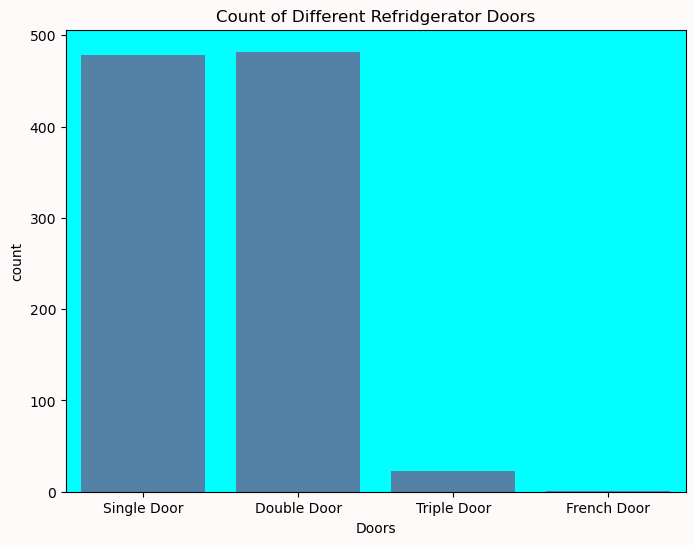

In [544]:
plt.figure(figsize=(8,6),facecolor='snow')
plt.axes(facecolor='aqua')
sns.countplot(x="Doors", data=df,color='steelblue')
plt.title("Count of Different Refridgerator Doors")
plt.show()

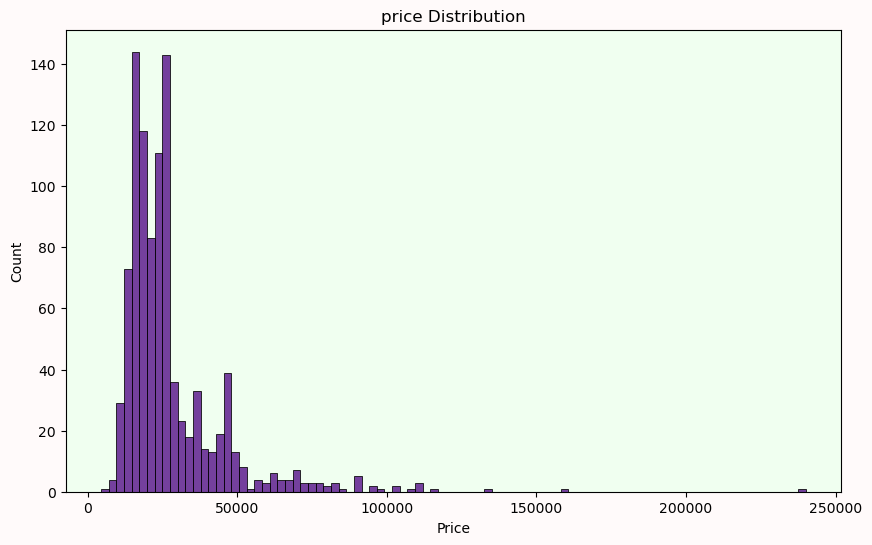

In [551]:
plt.figure(figsize=(10,6),facecolor='snow')
plt.axes(facecolor='honeydew')
sns.histplot(df["Price"],color='indigo')
plt.title("price Distribution")
plt.show()

### Bivariate Analysis

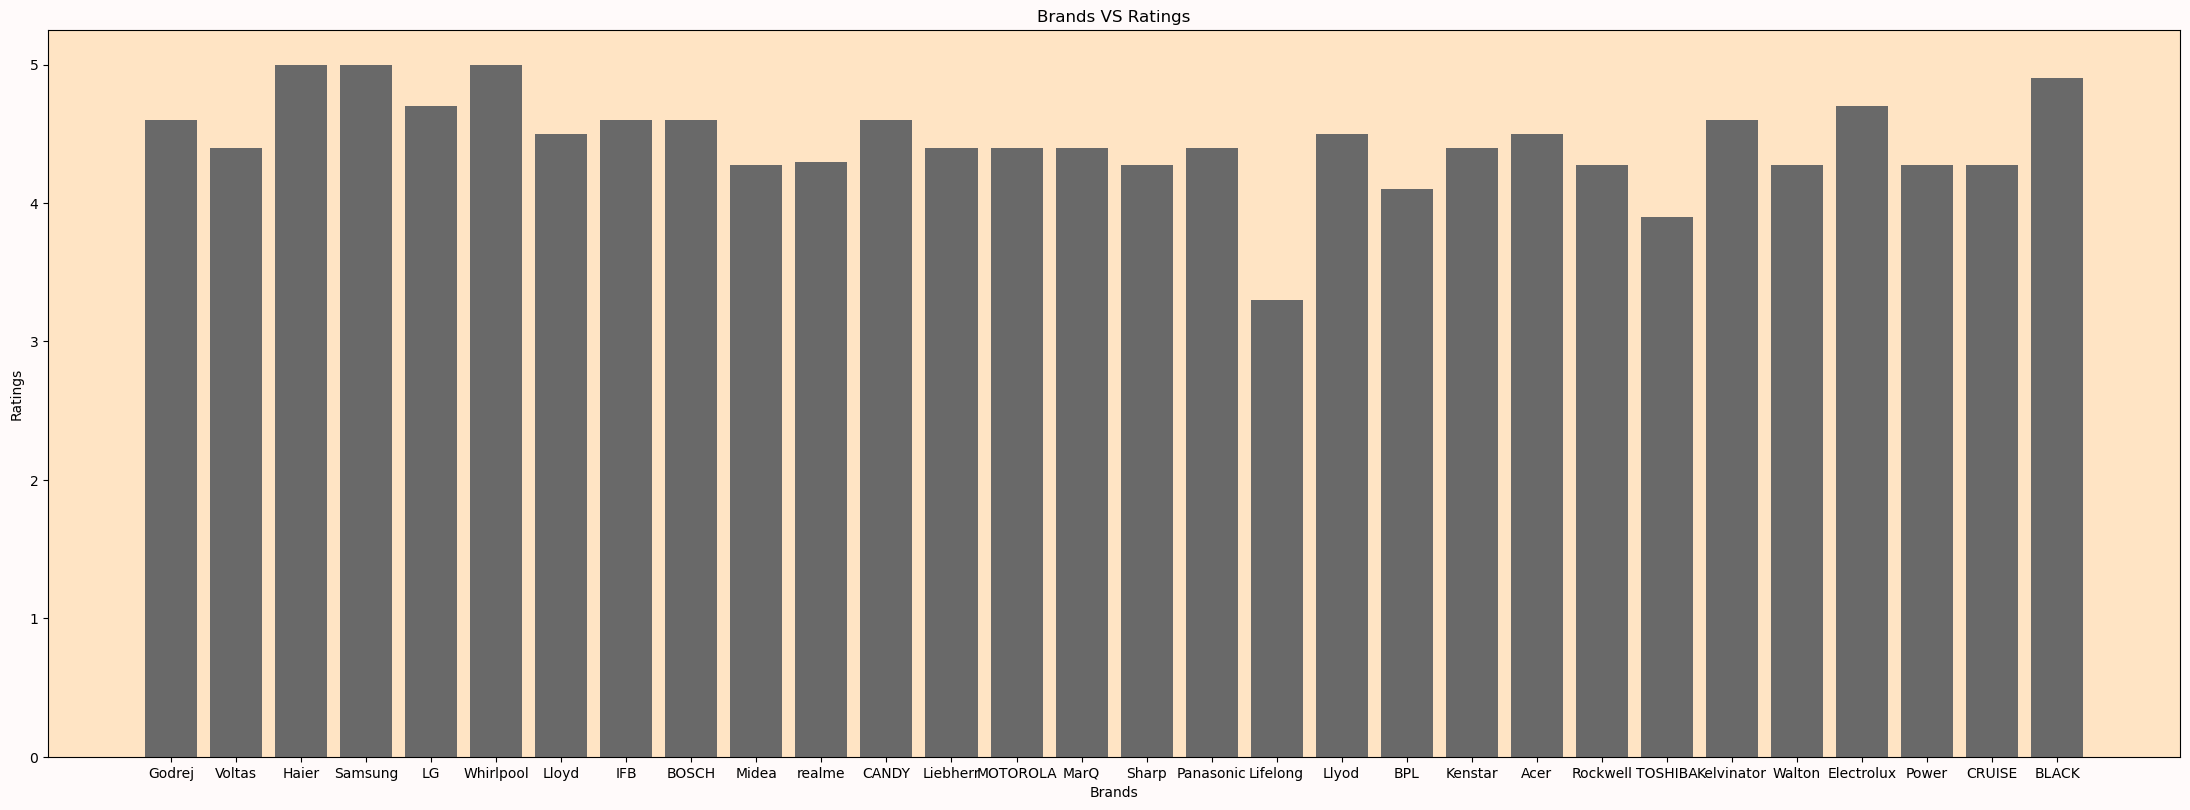

In [524]:
plt.figure(figsize=(22,8),facecolor='snow')
plt.axes(facecolor='bisque')
plt.bar(df['Brand'],df['Rating'],color='dimgray')
plt.xlabel('Brands')
plt.ylabel('Ratings')
plt.tight_layout()
plt.title('Brands VS Ratings')
plt.show()

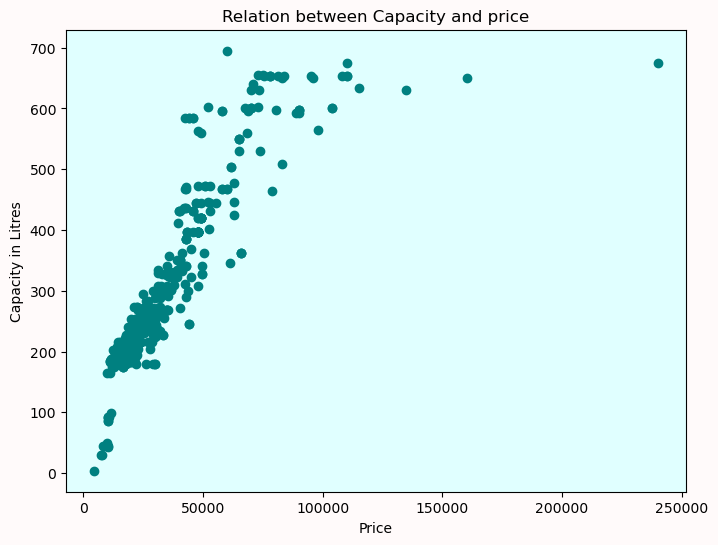

In [525]:
plt.figure(figsize=(8,6),facecolor='snow')
plt.axes(facecolor='lightcyan')
plt.scatter(df['Price'],df['Capacity(in L)'],color='teal')
plt.ylabel('Capacity in Litres')
plt.xlabel('Price')
plt.title('Relation between Capacity and price')
plt.show()

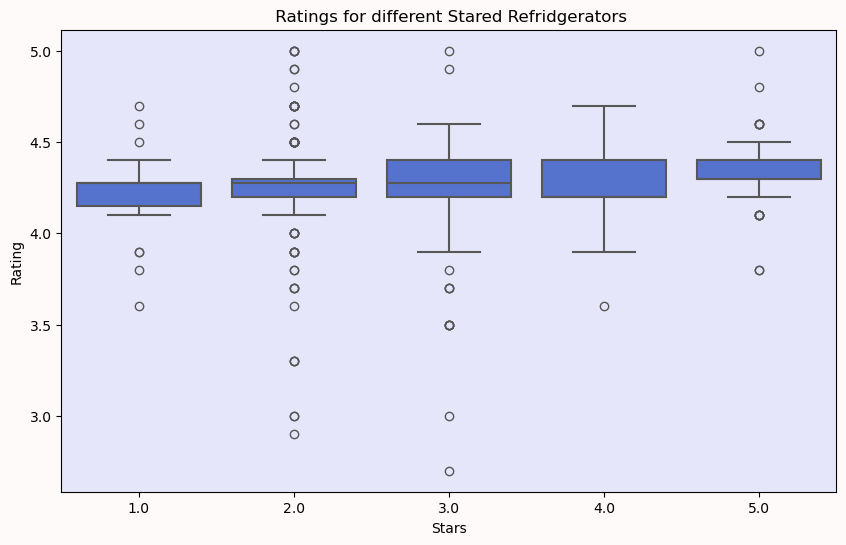

In [528]:
plt.figure(figsize=(10,6),facecolor='snow')
plt.axes(facecolor='lavender')
sns.boxplot(df,x='Stars',y='Rating',color='royalblue',linewidth=1.5,fliersize=6)
plt.title(' Ratings for different Stared Refridgerators')
plt.show()


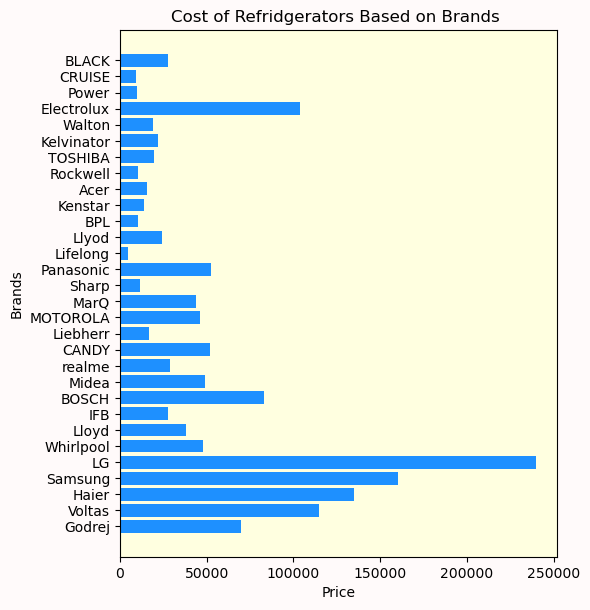

In [529]:
plt.figure(figsize=(6,6),facecolor='snow')
plt.axes(facecolor='lightyellow')
plt.barh(df['Brand'],df['Price'],color='dodgerblue')
plt.ylabel('Brands')
plt.xlabel('Price')
plt.tight_layout()
plt.title('Cost of Refridgerators Based on Brands ')
plt.show()

## Multivariate Analysis

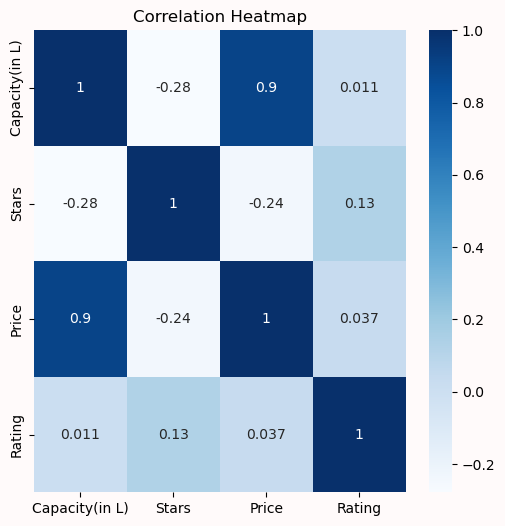

In [565]:
plt.figure(figsize=(6,6),facecolor='snow')
plt.axes(facecolor='lavender')
sns.heatmap(df[["Capacity(in L)","Stars","Price","Rating"]].corr(),annot=True,cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


<Figure size 1000x600 with 0 Axes>

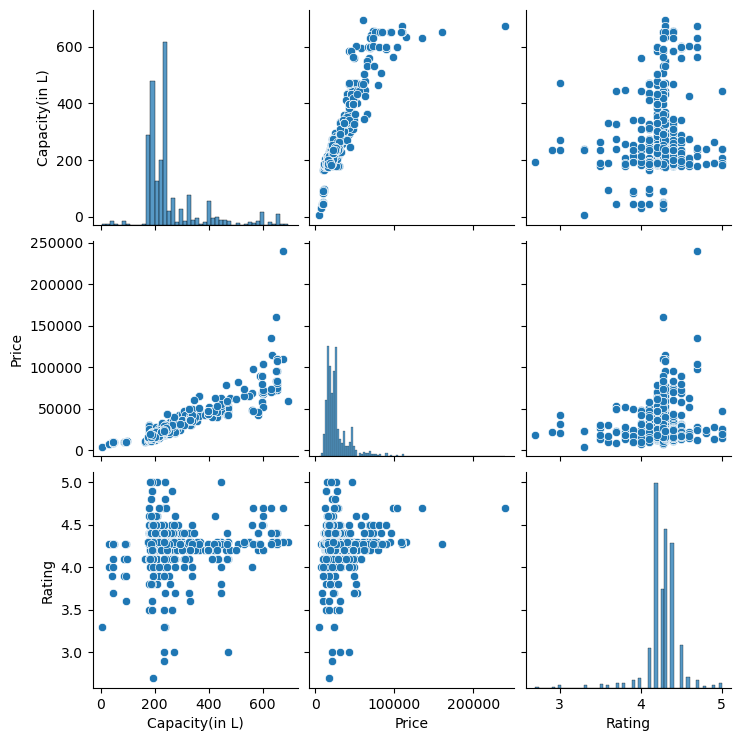

In [576]:
plt.figure(figsize=(10,6),facecolor='snow')
sns.pairplot(df[["Capacity(in L)","Price","Rating"]])
plt.show()

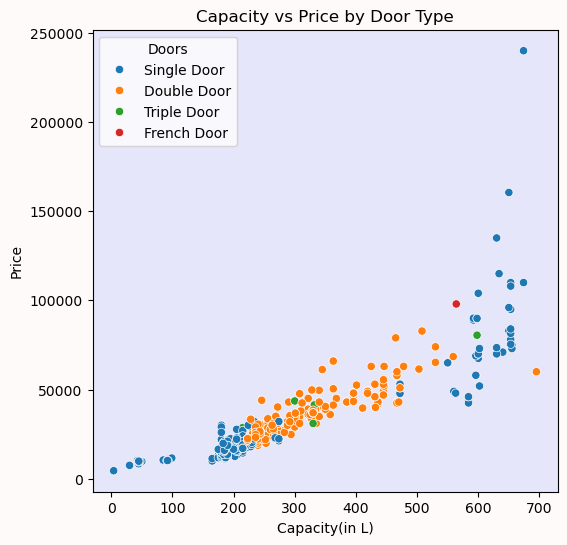

In [572]:
plt.figure(figsize=(6,6),facecolor='snow')
plt.axes(facecolor='lavender')
sns.scatterplot(x="Capacity(in L)", y="Price", hue="Doors",data=df)
plt.title("Capacity vs Price by Door Type")
plt.show()
